# Logistic Regression - Binary Classification


The goal of this notebook is to implement Scikit-Learn's Gradient Descent algorithm for Logistic Regression to perform binary classification.

We need to specify a solver (optimization algorithm) that supports the regression. Please see the notebook **Unconstrained Optimization Algorithms-How To** for a brief introduction to the commonly used solvers.

We will use regularization (l2 regularization) in our implementation of Logistic Regression. The strength of the regularization is controlled by the hyperparameter C.

### Note on Setting Hyperparameter C

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse C. 

The higher the value of C, the less the model is regularized.

More on Scikit-Learn's Logistic Regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# Dataset


We will use the iris dataset, which is a multivariate data set. 

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150

The dataset is also known as Fisher's Iris data set as it was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".


<img src="https://cse.unl.edu/~hasan/IrisFlowers.png",width=800,height=400>

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Explore The Dataset

In [10]:
iris = load_iris()

print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)

#print(iris.DESCR)

dict_keys(['target_names', 'target', 'data', 'feature_names', 'filename', 'DESCR'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


## Create Data Matrix (X) and the Label Vector (y)

We can use all features or a subset.

We will build a classifier to detect the Iris-Virginica type.

In [11]:
# For the experimentation we used two features

X = iris["data"][:, (2, 3)]  # petal length, petal width

y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

## Split Data Into Training and Test Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Scikit-Learn LogisticRegression Attributes Settting

We need to set the following attributes to train a Logistic Regression binary classifier.


- penalty : ‘l1’ or ‘l2’ (default: ‘l2’). Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.


- tol : Tolerance for stopping criteria. Default 1e-4.


- C : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. Default 1.0



- solver : ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’. Algorithm to use in the optimization problem.

    -- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

    -- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

    -- ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.


- max_iter : Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge. Default 100


# Binary Classification



## Model Selection for Binary Classifier: Hyperparameter Tuning

First, we need to find the optimal hyperparameters via Gridsearch.

In [21]:
%%time
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 
              'tol': [1e-3, 1e-4], 'max_iter':[10000, 20000],'C': [1, 10, 50]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy', cv=3)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Best Score (accuracy): 0.958333
Optimal Hyperparameter Values:  {'tol': 0.001, 'max_iter': 10000, 'C': 1, 'solver': 'newton-cg'}
CPU times: user 1.39 s, sys: 6.39 ms, total: 1.4 s
Wall time: 1.4 s


## Train the Optimal Logistic Regression Classifier

In [22]:
lg_reg_clf = LogisticRegression(**params_optimal)

lg_reg_clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.001, verbose=0, warm_start=False)

In [23]:
print("No. of Iterations:", lg_reg_clf.n_iter_ )
print("\nWeight Intercept:", lg_reg_clf.coef_ )
print("Weight Coefficients:", lg_reg_clf.coef_ )

No. of Iterations: [6]

Weight Intercept: [[2.61428292 2.06817633]]
Weight Coefficients: [[2.61428292 2.06817633]]


## Evaluate the Optimal Classifier on Test Data

In [24]:
y_test_predicted = lg_reg_clf.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Accuracy:  1.0

Test Confusion Matrix:
[[19  0]
 [ 0 11]]

Test Precision = 1.000000
Test Recall = 1.000000
Test F1 Score = 1.000000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Plot of Class Decision Boundary

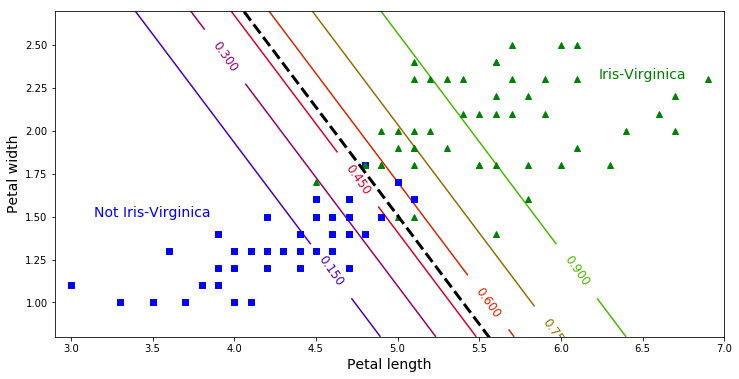

In [20]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = lg_reg_clf.predict_proba(X_new)

plt.figure(figsize=(12, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(lg_reg_clf.coef_[0][0] * left_right + lg_reg_clf.intercept_[0]) / lg_reg_clf.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Observation 

The above figure shows the resulting decision boundary (dashed line). 

Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on the two features. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. 

Notice that the <strong><font color=red size=6>decision boundary for two classes is linear</font></strong>. 

In other words, it illustrates the fact that Logistic Regression gives a **binary classifier**.

Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.
